# Lab: Gender gaps

## Source (Dataset)
Office of the National Statistics Gender Pay Gap [ONS Source](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables)

## Explanations (from the source)
+ Gender pay gap (GPG) - calculated as the difference between average hourly earnings (excluding overtime) of men and women as a proportion of average hourly earnings (excluding overtime) of men. For example, a 4% GPG denotes that women earn 4% less, on average, than men. Conversely, a -4% GPG denotes that women earn 4% more, on average, than men.

+ Mean: a measure of the average which is derived by summing the values for a given sample, and then dividing the sum by the number of observations (i.e. jobs) in the sample. In earnings distributions, the mean can be disproportionately influenced by a relatively small number of high-paying jobs.
																						
+ Median: the value below which 50% of jobs fall. It is ONS's preferred measure of average earnings as it is less affected by a relatively small number of very high earners and the skewed distribution of earnings. It therefore gives a better indication of typical pay than the mean.
																			
### Coverage and timeliness																									
The Annual Survey of Hours and Earnings (ASHE) covers employee jobs in the United Kingdom. It does not cover the self-employed, nor does it cover employees not paid during the reference period (2023).

GPG estimates are provided for the pay period that included a specified date in April. They relate to employees on adult rates of pay, whose earnings for the survey pay period were not affected by absence. 
	
ASHE is based on a 1% sample of jobs taken from HM Revenue and Customs' Pay As You Earn (PAYE) records. Consequently, individuals with more than one job may appear in the sample more than once.																	 

## Reading the dataset


In [152]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_profession = pd.read_excel('data/genderpaygap.xlsx', sheet_name='All')
df_profession_category = pd.read_excel('data/genderpaygap.xlsx', sheet_name='Main')
df_age = pd.read_excel('data/genderpaygap.xlsx', sheet_name='Age')
df_geography = pd.read_excel('data/genderpaygap.xlsx', sheet_name='Geography')

Let's have a look at our dataset

In [153]:
df_profession.tail()

Description  Code  GPGmedian GPGmean
31              Process, plant and machine operatives    81       14.0    14.1
32    Transport and mobile machine drivers and ope...    82       10.5     2.9
33                             Elementary occupations     9        5.8     8.1
34          Elementary trades and related occupations    91        7.1     7.7
35    Elementary administration and service occupa...    92        5.6     8.2

In [154]:
df_profession_category.tail()

Description  Code  GPGmedian  GPGmean
5                     Skilled trades occupations     5       19.0     14.5
6  Caring, leisure and other service occupations     6        1.5      2.0
7         Sales and customer service occupations     7        3.7      4.5
8          Process, plant and machine operatives     8       14.1     13.0
9                         Elementary occupations     9        5.8      8.1

In [155]:
df_age

age_group  GPGmedian  GPGmean
0      16-17b        0.0     -7.9
1       18-21        0.8     10.6
2       22-29        4.8      4.3
3       30-39       11.5      9.8
4       40-49       17.0     15.1
5       50-59       19.7     17.9
6         60+       18.1     18.2

In [156]:
df_geography.tail()

Description       Code GPGmedian GPGmean
385    South Lanarkshire  S12000029       6.1     7.5
386             Stirling  S12000030       7.4    21.9
387  West Dunbartonshire  S12000039      17.5    12.8
388         West Lothian  S12000040       8.3     9.6
389    Northern Ireland   N92000002       8.1     9.6

If you look at the Excel data files, we see that occupations have a main and sub-category. Since we have the main category values in df_profession_category anyway, let's drop them from 'df_profession' to retain the focus on sub-categories only. We can do this based on the values in the Code column since as you can see main category professions have code values < 10 and sub-categories have values greater than 10. 

In [157]:
indices_to_drop = df_profession[df_profession['Code'] < 10].index
df_profession.drop(indices_to_drop, inplace=True)
df_profession

Description  Code  GPGmedian GPGmean
2                    Corporate managers and directors    11       12.4    12.8
3                      Other managers and proprietors    12        4.8     8.6
5     Science, research, engineering and technolog...    21       10.2     9.2
6                                Health professionals    22       10.2    15.2
7        Teaching and other educational professionals    23        3.8     8.9
8     Business, media and public service professio...    24        7.9      11
10    Science, engineering and technology associat...    31       11.8       8
11     Health and social care associate professionals    32        4.7     4.9
12                     Protective service occupations    33        4.7     3.4
13              Culture, media and sports occupations    34        5.2       x
14    Business and public service associate profes...    35       13.9      18
16                         Administrative occupations    41        5.9     6.4
17                Secretarial and related occupations    42       -0.9    -2.3
19            Skilled agricultural and related trades    51       -6.4    -3.8
20    Skilled metal, electrical and electronic trades    52        9.4     2.3
21           Skilled construction and building trades    53       12.6     6.2
22        Textiles, printing and other skilled trades    54        3.4     4.4
24                Caring personal service occupations    61        0.7     0.7
25    Leisure, travel and related personal service...    62        5.3     7.4
26        Community and civil enforcement occupations    63      -28.9   -20.6
28                                  Sales occupations    71        1.8     6.3
29                       Customer service occupations    72        0.0     2.8
31              Process, plant and machine operatives    81       14.0    14.1
32    Transport and mobile machine drivers and ope...    82       10.5     2.9
34          Elementary trades and related occupations    91        7.1     7.7
35    Elementary administration and service occupa...    92        5.6     8.2

### Missing values
Let's check our data 

In [158]:
df_profession.info()
df_profession_category.info()
df_age.info()
df_geography.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 2 to 35
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  26 non-null     object 
 1   Code         26 non-null     int64  
 2   GPGmedian    26 non-null     float64
 3   GPGmean      26 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  10 non-null     object 
 1   Code         10 non-null     int64  
 2   GPGmedian    10 non-null     float64
 3   GPGmean      10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 452.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     -------------

In [159]:
# It looks like GPGmean is read as an object (string) in df_profession dataframe. 
# GPGmean and GPGmedian are both objects in df_geography
# Let's convert the data to float64, so we can create plots later
df_profession['GPGmean'] = pd.to_numeric(df_profession['GPGmean'], errors='coerce')
df_geography['GPGmean'] = pd.to_numeric(df_geography['GPGmean'], errors='coerce')
df_geography['GPGmedian'] = pd.to_numeric(df_geography['GPGmedian'], errors='coerce')

In [160]:
# Next, let's check for missing values
df_profession.isna().sum()
df_profession_category.isna().sum()
df_age.isna().sum()

age_group    0
GPGmedian    0
GPGmean      0
dtype: int64

All seems fine - let's get plotting

<Axes: >

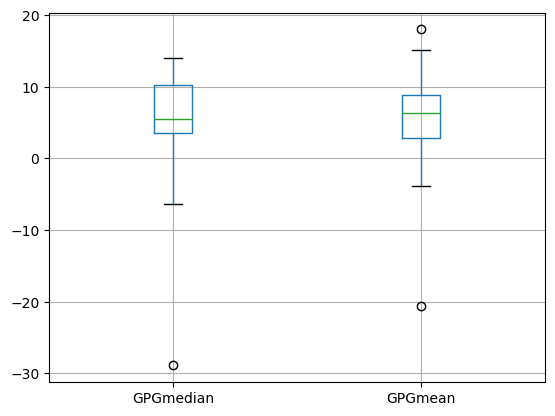

In [161]:
# Let's plot the mean and median Gender Pay Gap (GPG)
df_profession.boxplot(column=['GPGmedian', 'GPGmean'])

Hmmm, there are outliers. Let's check the descriptive statistics

In [162]:
# Let's look at the distribution of the values in the columns
df_profession.describe()

Code  GPGmedian   GPGmean
count  26.000000  26.000000  25.00000
mean   47.923077   4.988462   5.70800
std    23.918065   8.505778   7.49277
min    11.000000 -28.900000 -20.60000
25%    31.250000   3.500000   2.90000
50%    46.500000   5.450000   6.40000
75%    62.750000  10.200000   8.90000
max    92.000000  14.000000  18.00000

<Axes: ylabel='Frequency'>

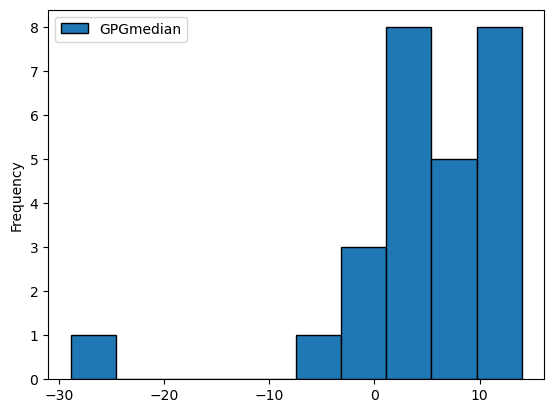

In [163]:
# Let's try to visualise what's going on with a histogram - what type of skew do you notice?
df_profession[['GPGmedian']].plot(kind='hist', ec='black')

Hmmm, there appears to be a lone bin in our histogram. Which might be the profession or professions where women earn more than men?

In [164]:
#| column: page-right

# Is there one profession or more professions where women earn more? Let's do some investigation through visualisation. 
import altair as alt
alt.Chart(df_profession).mark_bar().encode(
    alt.X("GPGmedian:Q", bin=True, title='GPGmedian'), 
    y=alt.Y('Description:N', sort='-x', title='Professional Category'),  
    color='Description:N',
    tooltip=['Description', 'GPGmedian']
).properties(
    width=600,
    height=400
)

alt.Chart(...)

This plot shows us that Community and civil enforcement occupations, skilled agricultural and related trades, and secretarial and related occupations are the ones where women earn, on average, more than men. 

If you are wondering what 'community and civil enforcement occupations' mean - then [this ONS source](https://www.ons.gov.uk/methodology/classificationsandstandards/standardoccupationalclassificationsoc/soc2020/soc2020volume1structureanddescriptionsofunitgroups) says it includes police community and parking and civil enforcement officers.

Are these occupations the ones you suspected women to earn more than men (on average)?

::: callout-caution

### Sidenote

The above visualisation is detailed, but it's busy and cluttered. How about if we try doing this on `df_profession_category` instead?

:::

In [165]:
#| column: page-right

# Is there one profession where Women earn more? Let's do some investigation. 
import altair as alt
alt.Chart(df_profession_category).mark_bar().encode(
    alt.X("GPGmedian:Q", bin=True), 
    y=alt.Y('Description:N', sort='-x'),  
    color='Description:N',
    tooltip=['Description', 'GPGmedian']
).properties(
    width=600,
    height=400
)

alt.Chart(...)

In this, we have lost some of the detail we had in the earlier visualisation, but we get to know that "Caring, leisure and other service occupations" is a 'main category' of occcupation where the GPG is low (but women don't earn more than men). 

::: callout-caution

### Sidenote
What does this narrative tell you about women being more likely to do multiple jobs to work around their domestic responsibilities which we spoke about in the lecture (and recordings)?

:::

<Axes: xlabel='Description'>

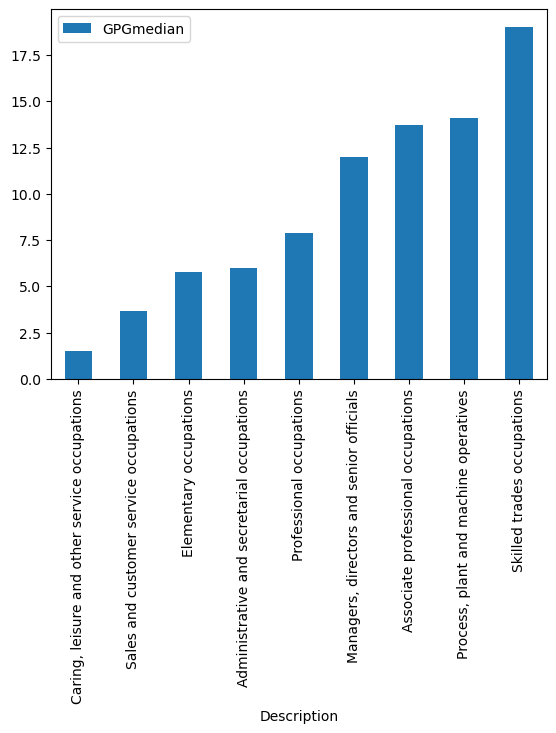

In [166]:
# Alternative visualisation (excluding all employees category)

# In which main professional categories is the gap narrow? Let's find out!
df_professions_sorted = df_profession_category.sort_values('GPGmedian', ascending=True)

# Let's drop the row corresponding to 'All employees' because we are more interested in looking at the differences across professional categories and sub-categories here 
df_professions_sorted = df_professions_sorted[df_professions_sorted['Description'] != 'All employees']

# Let's create the bar plot
df_professions_sorted.plot.bar(x='Description', y='GPGmedian')

Let's look at age-based differences next:

<Axes: xlabel='age_group'>

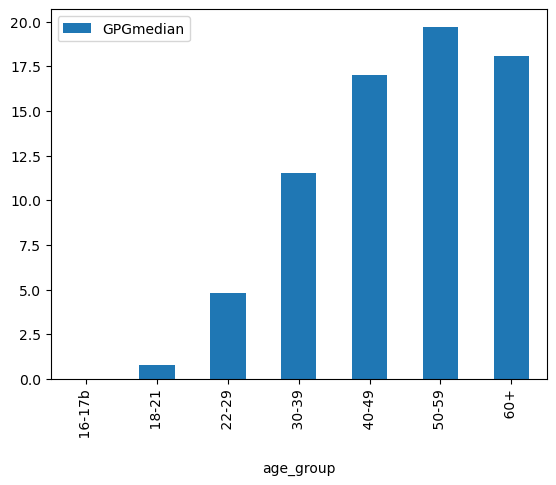

In [167]:
df_age.sort_values('age_group', ascending=True).plot.bar(x = 'age_group', y = 'GPGmedian')

::: callout-caution

### Reflection

It seems that GPG increases with age - what does this say about our dicussion during the lectures about GPG increasing for women who take time off from work for a variety of reasons compared to their male and female counterparts who do not take time out of work! What do you think might be the reasons for the minor fall in GPG at 60+?

:::

## Geography

#### But first: 

Since moving on from our Iris and Wine datasets, the real-world datasets rarely come prepared (ready to use).

+ If you download the zip file for the latest [2023 Pay Gap ONS statistics](https://www.ons.gov.uk/file?uri=/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables/2023provisional/genderpaygap2023provisional.zip), you will notice that they have color-coded their cells based on the certainty of estimates. On the one hand, this is very good practice - being transparent about the quality of the data. On the other hand, it tells us that we need to be careful about what insights we can draw from the data.
+ If you look at the statistics for one year, you can get a glimpse of what's happening across various categories (geography, age, profession, etc.) in terms of GPG but it's a cross-sectional view. But you can collate a longitudinal view should you wish to. E.g., by downloading the zip folders across the desired years and collating the information for desired categories for multiple years. But remember that this will be a 'simplified approach' to a longitudinal view and will have limitations. Also, recollect one of the figures Cagatay showed in the earlier lectures - it's common to spend a lot of time at the start of your Data Science project just collating the necessary information. If you fancy, you can write a script to automate the data collation process!
+ We have geography information as area codes from the ONS source, but wouldn't it be nice if we are able to visualise GPG by Geography on a map of England (with [Levelling Up agenda](https://www.gov.uk/government/publications/levelling-up-the-united-kingdom) and all). That's the data hunt I went on. And the ONS' Geodata portal provides datasets from the different administrative boundaries, so I downloaded this one:[Counties and Unitary Authorities (May 2023) Boundaries UK BUC](https://geoportal.statistics.gov.uk/datasets/ons::counties-and-unitary-authorities-may-2023-boundaries-uk-buc/about). Now let's see what visualisation we can create with it.
  
::: callout-tip

### Takeaway

Collating data from multiple sources is a significant, valuable and legitimate part of the Data Science project journey

:::

In [168]:
# Getting the geospatial polygons for England
import geopandas as gpd 
import altair as alt

geo_states_england = gpd.read_file('data/Counties_and_Unitary_Authorities_May_2023_UK_BUC_-7406349609691062173.gpkg')
geo_states_england.head()

CTYUA23CD             CTYUA23NM CTYUA23NMW   BNG_E   BNG_N     LONG  \
0  E06000001            Hartlepool             447160  531474 -1.27018   
1  E06000002         Middlesbrough             451141  516887 -1.21099   
2  E06000003  Redcar and Cleveland             464361  519597 -1.00608   
3  E06000004      Stockton-on-Tees             444940  518183 -1.30664   
4  E06000005            Darlington             428029  515648 -1.56835   

         LAT                                GlobalID  \
0  54.676102  {224B1BB0-27FA-4B44-AD01-F22525CE232E}   
1  54.544701  {8A06DF87-1F09-4A1C-9D6E-A32D40A0B159}   
2  54.567501  {4A930CE8-4656-4A98-880E-8110EE3D8501}   
3  54.556900  {304224A1-E808-4BF2-8F3E-AC43B0368BE8}   
4  54.535301  {F7BBD06A-7E09-4832-90D0-F6CA591D4A1D}   

                                            geometry  
0  MULTIPOLYGON (((448973.593 536745.277, 448290....  
1  MULTIPOLYGON (((451894.299 521145.303, 448410....  
2  MULTIPOLYGON (((478232.568 518788.831, 478074....  
3  MULTIPOLYGON (((452243.536 526335.188, 451148....  
4  MULTIPOLYGON (((436388.002 522354.197, 435529....

In [169]:
print(geo_states_england.columns)

Index(['CTYUA23CD', 'CTYUA23NM', 'CTYUA23NMW', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID', 'geometry'],
      dtype='object')


In [170]:
# Let's drop the columns we don't need
geo_states_england = geo_states_england.drop(['CTYUA23NMW', 'BNG_E', 'BNG_N', 'GlobalID'], axis=1)

In [171]:
# Let's check again
geo_states_england.head()

CTYUA23CD             CTYUA23NM     LONG        LAT  \
0  E06000001            Hartlepool -1.27018  54.676102   
1  E06000002         Middlesbrough -1.21099  54.544701   
2  E06000003  Redcar and Cleveland -1.00608  54.567501   
3  E06000004      Stockton-on-Tees -1.30664  54.556900   
4  E06000005            Darlington -1.56835  54.535301   

                                            geometry  
0  MULTIPOLYGON (((448973.593 536745.277, 448290....  
1  MULTIPOLYGON (((451894.299 521145.303, 448410....  
2  MULTIPOLYGON (((478232.568 518788.831, 478074....  
3  MULTIPOLYGON (((452243.536 526335.188, 451148....  
4  MULTIPOLYGON (((436388.002 522354.197, 435529....

In [172]:
# Let's create a map of England
pre_GPG_England = alt.Chart(geo_states_england, title='Map of England').mark_geoshape().encode(
    tooltip=['CTYUA23NM']
).properties(
    width=500,
    height=300
)
pre_GPG_England

alt.Chart(...)

Wait, what's that?! That's not what we were expecting!

::: callout-warning

## Map projections

Because the Earth is round, and maps are flat, geospatial data needs to be "projected". There are many types of projecting geospatial data, and all of them come with some tradeoff in terms of distorting area and/or distance (in other words, none of them are perfect). You can read more [here](https://en.wikipedia.org/wiki/Map_projection).

Now, the geospatial dataset that we are using for this notebook was downloaded from the [Office for National Statistics' Geoportal](https://geoportal.statistics.gov.uk/datasets/ons::counties-and-unitary-authorities-may-2023-boundaries-uk-buc/about) and uses a Coordinate Reference System (CRS)
known as `EPSG:27700 - OSGB36 / British National Grid`. Regretfully, Altair works with a different CRS:  `WGS 84` (also known as `epsg:4326`), and this is creating the conflict.

We have two options: either reproject our data using geopandas, or according to [Altair documentation](https://altair-viz.github.io/user_guide/data.html#projections) try using the project configuration `(type: 'identity', reflectY': True)`. It draws the geometries without applying a projection.

:::

In [173]:
#| code-line-numbers: "|7|10"

# Let's create a map of England
pre_GPG_England = alt.Chart(
    geo_states_england, title='Map of England'
).mark_geoshape().encode(
    tooltip=['CTYUA23NM']
).properties(
    width=500,
    height=300
).project(
    type='identity',
    reflectY=True
)
pre_GPG_England

alt.Chart(...)

In [174]:
df_geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  390 non-null    object 
 1   Code         390 non-null    object 
 2   GPGmedian    386 non-null    float64
 3   GPGmean      387 non-null    float64
dtypes: float64(2), object(2)
memory usage: 12.3+ KB


In [175]:
geo_states_england

CTYUA23CD             CTYUA23NM     LONG        LAT  \
0    E06000001            Hartlepool -1.27018  54.676102   
1    E06000002         Middlesbrough -1.21099  54.544701   
2    E06000003  Redcar and Cleveland -1.00608  54.567501   
3    E06000004      Stockton-on-Tees -1.30664  54.556900   
4    E06000005            Darlington -1.56835  54.535301   
..         ...                   ...      ...        ...   
213  W06000020               Torfaen -3.05101  51.698399   
214  W06000021         Monmouthshire -2.90280  51.778301   
215  W06000022               Newport -2.89769  51.582298   
216  W06000023                 Powys -3.43531  52.348598   
217  W06000024        Merthyr Tydfil -3.36425  51.748600   

                                              geometry  
0    MULTIPOLYGON (((448973.593 536745.277, 448290....  
1    MULTIPOLYGON (((451894.299 521145.303, 448410....  
2    MULTIPOLYGON (((478232.568 518788.831, 478074....  
3    MULTIPOLYGON (((452243.536 526335.188, 451148....  
4    MULTIPOLYGON (((436388.002 522354.197, 435529....  
..                                                 ...  
213  MULTIPOLYGON (((333723.000 192653.903, 330700....  
214  MULTIPOLYGON (((329597.402 229251.797, 326793....  
215  MULTIPOLYGON (((343091.833 184213.309, 342279....  
216  MULTIPOLYGON (((322891.550 333139.949, 321104....  
217  MULTIPOLYGON (((308057.304 211036.201, 306294....  

[218 rows x 5 columns]

In [176]:
df_geography

Description       Code  GPGmedian  GPGmean
0              Darlington UA  E06000005        5.4     13.3
1              Hartlepool UA  E06000001        6.2      8.9
2           Middlesbrough UA  E06000002       14.5     15.6
3    Redcar and Cleveland UA  E06000003       12.8     12.3
4        Stockton-on-Tees UA  E06000004       17.1     16.9
..                       ...        ...        ...      ...
385        South Lanarkshire  S12000029        6.1      7.5
386                 Stirling  S12000030        7.4     21.9
387      West Dunbartonshire  S12000039       17.5     12.8
388             West Lothian  S12000040        8.3      9.6
389        Northern Ireland   N92000002        8.1      9.6

[390 rows x 4 columns]

In [177]:
# Add the data
geo_states_england_merged = geo_states_england.merge(df_geography, left_on = 'CTYUA23CD', right_on = 'Code')

In [178]:
# Check the merged data
geo_states_england_merged.head(10)

CTYUA23CD                    CTYUA23NM     LONG        LAT  \
0  E06000001                   Hartlepool -1.27018  54.676102   
1  E06000002                Middlesbrough -1.21099  54.544701   
2  E06000003         Redcar and Cleveland -1.00608  54.567501   
3  E06000004             Stockton-on-Tees -1.30664  54.556900   
4  E06000005                   Darlington -1.56835  54.535301   
5  E06000006                       Halton -2.68853  53.334202   
6  E06000007                   Warrington -2.56167  53.391602   
7  E06000008        Blackburn with Darwen -2.46360  53.700802   
8  E06000009                    Blackpool -3.02199  53.821602   
9  E06000010  Kingston upon Hull, City of -0.30382  53.769199   

                                            geometry  \
0  MULTIPOLYGON (((448973.593 536745.277, 448290....   
1  MULTIPOLYGON (((451894.299 521145.303, 448410....   
2  MULTIPOLYGON (((478232.568 518788.831, 478074....   
3  MULTIPOLYGON (((452243.536 526335.188, 451148....   
4  MULTIPOLYGON (((436388.002 522354.197, 435529....   
5  MULTIPOLYGON (((358131.901 385425.802, 355191....   
6  MULTIPOLYGON (((367582.201 396058.199, 367158....   
7  MULTIPOLYGON (((372966.498 423266.501, 371465....   
8  MULTIPOLYGON (((333572.799 437130.702, 333041....   
9  MULTIPOLYGON (((515429.592 427689.472, 516047....   

                Description       Code  GPGmedian  GPGmean  
0             Hartlepool UA  E06000001        6.2      8.9  
1          Middlesbrough UA  E06000002       14.5     15.6  
2   Redcar and Cleveland UA  E06000003       12.8     12.3  
3       Stockton-on-Tees UA  E06000004       17.1     16.9  
4             Darlington UA  E06000005        5.4     13.3  
5                 Halton UA  E06000006        3.4      4.6  
6             Warrington UA  E06000007       12.8     14.6  
7  Blackburn with Darwen UA  E06000008       22.3     15.3  
8              Blackpool UA  E06000009        4.4      3.5  
9     Kingston upon Hull UA  E06000010       16.1      7.9

In [179]:
# Let's plot the GPG by geography now
post_GPG_England = alt.Chart(geo_states_england_merged, title='GPG by region - England').mark_geoshape().encode(
    color='GPGmedian',
    tooltip=['Description', 'GPGmedian']
).properties(
    width=500,
    height=300
).project(
    type='identity',
    reflectY=True
)
post_GPG_England

alt.Chart(...)

In [180]:
#| column: page

# side by side view
GPG_England = pre_GPG_England | post_GPG_England
GPG_England

alt.HConcatChart(...)

How do the results in this workbook compare to the visualisation we saw during the lecture, for example, for the UK in [Information is Beautiful](https://informationisbeautiful.net/visualizations/gender-pay-gap/) But remember the earnings across the two might be for different years - do remember to check the metadata!